<a href="https://colab.research.google.com/github/Monica-Restrepo/clases-programacion/blob/main/Visualizacion_datos_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización de datos con Python: Matplotlib, Seaborn y Ploty

In [38]:
import pandas as pd

In [86]:
data = pd.read_csv('/content/inmigrantes_canada.csv')
data.head()

,Pais,Continente,Region,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afganistán,Asia,Sur de Asia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europa,Sur de Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argelia,África,Norte de África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceanía,Polinesia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sur de Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [40]:
df.shape

(195, 38)

In [41]:
df.info()

# nno tenemos que tratar los datos, porque no hay regsitros nulos y las variables tienen el tipo adecuado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Pais        195 non-null    object
 1   Continente  195 non-null    object
 2   Region      195 non-null    object
 3   1980        195 non-null    int64 
 4   1981        195 non-null    int64 
 5   1982        195 non-null    int64 
 6   1983        195 non-null    int64 
 7   1984        195 non-null    int64 
 8   1985        195 non-null    int64 
 9   1986        195 non-null    int64 
 10  1987        195 non-null    int64 
 11  1988        195 non-null    int64 
 12  1989        195 non-null    int64 
 13  1990        195 non-null    int64 
 14  1991        195 non-null    int64 
 15  1992        195 non-null    int64 
 16  1993        195 non-null    int64 
 17  1994        195 non-null    int64 
 18  1995        195 non-null    int64 
 19  1996        195 non-null    int64 
 20  1997      

In [42]:
# nos vamoa a enfocar en la tendencia de inmigrantes colombianos a cadana
# modificamos el indice para que se llame pais

df.set_index('Pais', inplace=True)
df.head()

,Continente,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Pais,,,,,,,,,,,,,,,,,,,,,
Afganistán,Asia,Sur de Asia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europa,Sur de Europa,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699
Argelia,África,Norte de África,80,67,71,69,63,44,69,132,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
Samoa Americana,Oceanía,Polinesia,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europa,Sur de Europa,0,0,0,0,0,0,2,0,...,0,1,1,0,0,0,0,1,1,15


In [43]:
# hacemos un filtro para separar los años

anos = list(map(str, range(1980, 2014)))
anos

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [44]:
# ahora creamos una variable colombia y con loc nos ayuda a encontrar colombia dentro de la variable anos

colombia = df.loc['Colombia', anos]
colombia

# muestra los años y la cantidad de inmigrantes por año

,Colombia
1980,266
1981,326
1982,360
1983,244
1984,235
1985,214
1986,257
1987,376
1988,352
1989,439


In [45]:
# hay que crear un dataframe con esta información, pero primero vamos a crear un dicicionario

col_dict = {'Año':colombia.index.tolist(),
            'Inmigrantes':colombia.values.tolist()}
col_dict

{'Año': ['1980',
  '1981',
  '1982',
  '1983',
  '1984',
  '1985',
  '1986',
  '1987',
  '1988',
  '1989',
  '1990',
  '1991',
  '1992',
  '1993',
  '1994',
  '1995',
  '1996',
  '1997',
  '1998',
  '1999',
  '2000',
  '2001',
  '2002',
  '2003',
  '2004',
  '2005',
  '2006',
  '2007',
  '2008',
  '2009',
  '2010',
  '2011',
  '2012',
  '2013'],
 'Inmigrantes': [np.int64(266),
  np.int64(326),
  np.int64(360),
  np.int64(244),
  np.int64(235),
  np.int64(214),
  np.int64(257),
  np.int64(376),
  np.int64(352),
  np.int64(439),
  np.int64(614),
  np.int64(652),
  np.int64(582),
  np.int64(464),
  np.int64(375),
  np.int64(371),
  np.int64(381),
  np.int64(578),
  np.int64(929),
  np.int64(1306),
  np.int64(2259),
  np.int64(2965),
  np.int64(3283),
  np.int64(4318),
  np.int64(4566),
  np.int64(6424),
  np.int64(6535),
  np.int64(5357),
  np.int64(5452),
  np.int64(4652),
  np.int64(5218),
  np.int64(4366),
  np.int64(3741),
  np.int64(3631)]}

In [46]:
# Ahora si creamos el dataframe

datos_col = pd.DataFrame(col_dict)
datos_col.tail()

,Año,Inmigrantes
29,2009,4652
30,2010,5218
31,2011,4366
32,2012,3741
33,2013,3631


In [47]:
import matplotlib.pyplot as plt

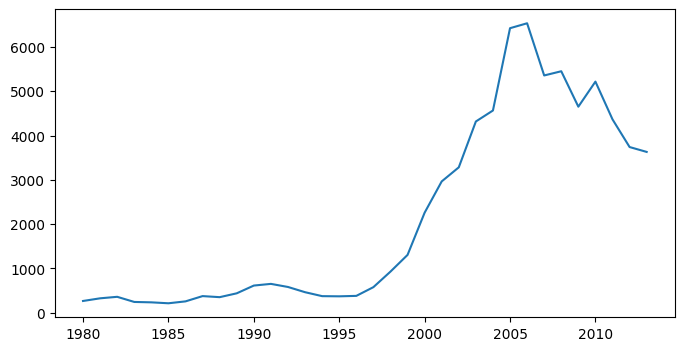

In [48]:
plt.figure(figsize=(8,4))
plt.plot(datos_col['Año'], datos_col['Inmigrantes'])
plt.xticks(['1980','1985','1990','1995','2000','2005','2010'])
plt.show()

# plot = grafico de linea

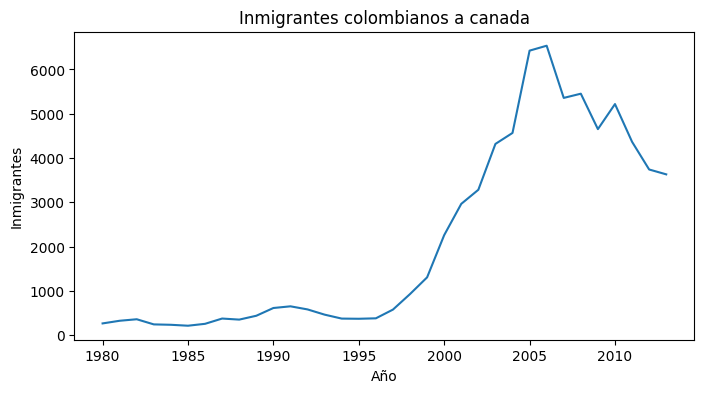

In [49]:
plt.figure(figsize=(8,4))
plt.plot(datos_col['Año'], datos_col['Inmigrantes'])
plt.xticks(['1980','1985','1990','1995','2000','2005','2010'])
plt.title('Inmigrantes colombianos a canada')
plt.xlabel('Año')
plt.ylabel('Inmigrantes')
plt.show()

In [50]:
argentina = df.loc['Argentina', anos]
argentina

,Argentina
1980,368
1981,426
1982,626
1983,241
1984,237
1985,196
1986,213
1987,519
1988,374
1989,538


In [51]:
arg_dict = {'Año':argentina.index.tolist(),
            'Inmigrantes':argentina.values.tolist()}
arg_dict

{'Año': ['1980',
  '1981',
  '1982',
  '1983',
  '1984',
  '1985',
  '1986',
  '1987',
  '1988',
  '1989',
  '1990',
  '1991',
  '1992',
  '1993',
  '1994',
  '1995',
  '1996',
  '1997',
  '1998',
  '1999',
  '2000',
  '2001',
  '2002',
  '2003',
  '2004',
  '2005',
  '2006',
  '2007',
  '2008',
  '2009',
  '2010',
  '2011',
  '2012',
  '2013'],
 'Inmigrantes': [np.int64(368),
  np.int64(426),
  np.int64(626),
  np.int64(241),
  np.int64(237),
  np.int64(196),
  np.int64(213),
  np.int64(519),
  np.int64(374),
  np.int64(538),
  np.int64(678),
  np.int64(763),
  np.int64(1023),
  np.int64(1022),
  np.int64(366),
  np.int64(380),
  np.int64(396),
  np.int64(391),
  np.int64(349),
  np.int64(318),
  np.int64(427),
  np.int64(635),
  np.int64(865),
  np.int64(1745),
  np.int64(1591),
  np.int64(1153),
  np.int64(847),
  np.int64(620),
  np.int64(540),
  np.int64(467),
  np.int64(459),
  np.int64(278),
  np.int64(263),
  np.int64(282)]}

In [52]:
datos_arg = pd.DataFrame(arg_dict)
datos_arg.tail()

,Año,Inmigrantes
29,2009,467
30,2010,459
31,2011,278
32,2012,263
33,2013,282


In [53]:
brasil = df.loc['Brasil', anos]
brasil

,Brasil
1980,211
1981,220
1982,192
1983,139
1984,145
1985,130
1986,205
1987,244
1988,394
1989,650


In [54]:
bra_dict = {'Año':brasil.index.tolist(),
            'Inmigrantes':brasil.values.tolist()}
bra_dict

{'Año': ['1980',
  '1981',
  '1982',
  '1983',
  '1984',
  '1985',
  '1986',
  '1987',
  '1988',
  '1989',
  '1990',
  '1991',
  '1992',
  '1993',
  '1994',
  '1995',
  '1996',
  '1997',
  '1998',
  '1999',
  '2000',
  '2001',
  '2002',
  '2003',
  '2004',
  '2005',
  '2006',
  '2007',
  '2008',
  '2009',
  '2010',
  '2011',
  '2012',
  '2013'],
 'Inmigrantes': [np.int64(211),
  np.int64(220),
  np.int64(192),
  np.int64(139),
  np.int64(145),
  np.int64(130),
  np.int64(205),
  np.int64(244),
  np.int64(394),
  np.int64(650),
  np.int64(650),
  np.int64(877),
  np.int64(1066),
  np.int64(866),
  np.int64(566),
  np.int64(572),
  np.int64(586),
  np.int64(591),
  np.int64(531),
  np.int64(626),
  np.int64(845),
  np.int64(847),
  np.int64(745),
  np.int64(839),
  np.int64(917),
  np.int64(969),
  np.int64(1181),
  np.int64(1746),
  np.int64(2138),
  np.int64(2509),
  np.int64(2598),
  np.int64(1508),
  np.int64(1642),
  np.int64(1714)]}

In [55]:
datos_bra = pd.DataFrame(bra_dict)
datos_bra.tail()

,Año,Inmigrantes
29,2009,2509
30,2010,2598
31,2011,1508
32,2012,1642
33,2013,1714


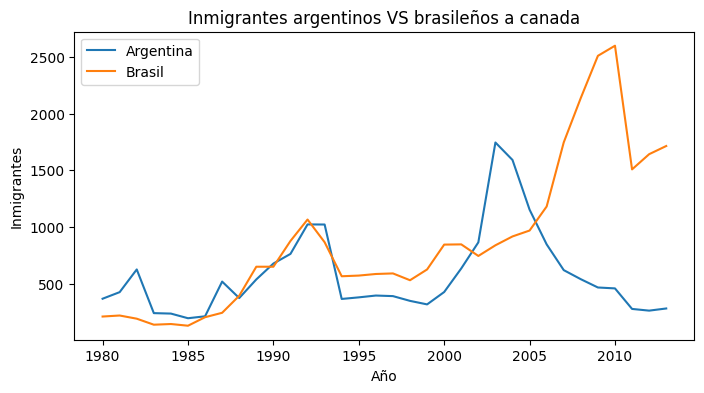

In [56]:
plt.figure(figsize=(8,4))
plt.plot(datos_arg['Año'], datos_arg['Inmigrantes'], label='Argentina')
plt.plot(datos_bra['Año'], datos_bra['Inmigrantes'], label='Brasil')
plt.xticks(['1980','1985','1990','1995','2000','2005','2010'])
plt.title('Inmigrantes argentinos VS brasileños a canada')
plt.xlabel('Año')
plt.ylabel('Inmigrantes')
plt.legend()
plt.show()

In [57]:
# otra forma de hacerlo

df_comparacion = df.loc[['Brasil', 'Argentina'], anos]

In [58]:
# para transponer el dataframe

df_comparacion = df_comparacion.T
df_comparacion.head()

Pais,Brasil,Argentina
1980,211,368
1981,220,426
1982,192,626
1983,139,241
1984,145,237


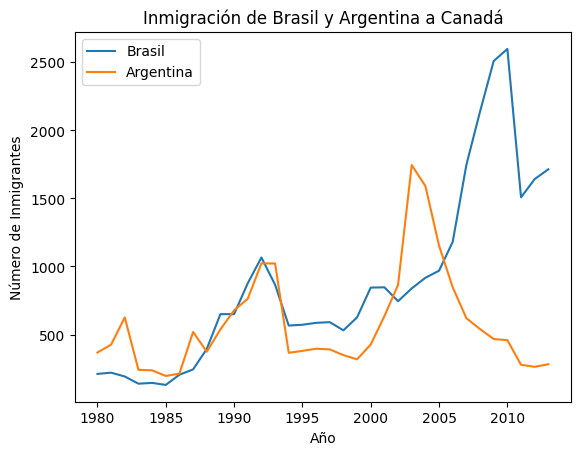

In [59]:
plt.plot(df_comparacion['Brasil'], label='Brasil')
plt.plot(df_comparacion['Argentina'], label='Argentina')
plt.title('Inmigración de Brasil y Argentina a Canadá')
plt.xlabel('Año')
plt.ylabel('Número de Inmigrantes')
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])
plt.legend()
plt.show()

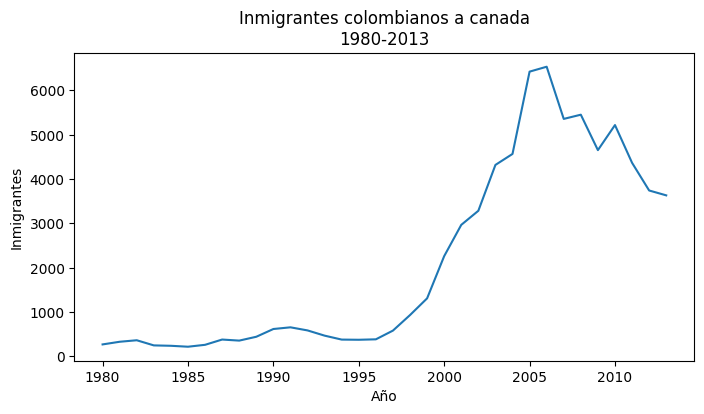

In [60]:
# para mejorar los graficos es necesario guardarlos en una variable fig=lienzo, ax=figura

fif, ax= plt.subplots(figsize=(8,4))
ax.plot(datos_col['Año'], datos_col['Inmigrantes'])
# con esta función me separa las fechas de 5 en 5
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.set_title('Inmigrantes colombianos a canada\n1980-2013')
ax.set_xlabel('Año')
ax.set_ylabel('Inmigrantes')
plt.show()

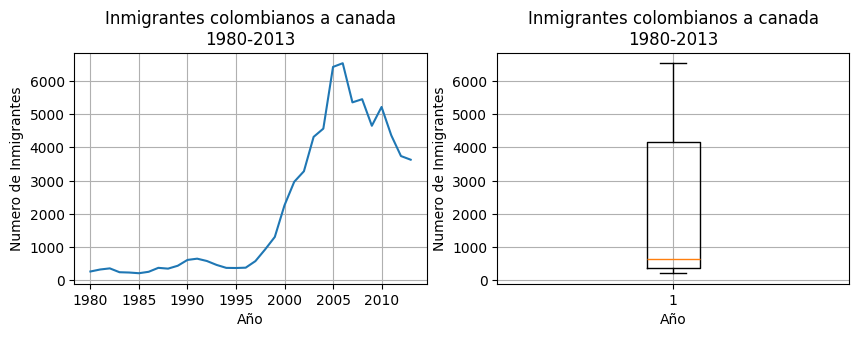

In [61]:
# hacer un gráfico de cajas para ver estadistica descriptiva
# Hacer un gráfico con dos subgráficos:

fig, axs = plt.subplots(1,2, figsize=(10,3))

axs[0].plot(datos_col['Año'], datos_col['Inmigrantes'])
axs[0].set_title('Inmigrantes colombianos a canada\n1980-2013')
axs[0].set_xlabel('Año')
axs[0].set_ylabel('Numero de Inmigrantes')
axs[0].xaxis.set_major_locator(plt.MultipleLocator(5))
axs[0].grid()

axs[1].boxplot(datos_col['Inmigrantes'])
axs[1].set_title('Inmigrantes colombianos a canada\n1980-2013')
axs[1].set_xlabel('Año')
axs[1].set_ylabel('Numero de Inmigrantes')
axs[1].grid()

In [62]:
datos_col.describe()

,Inmigrantes
count,34.000000
mean,2120.235294
std,2163.761316
min,214.000000
25%,372.000000
50%,633.000000
75%,4173.750000
max,6535.000000


InvalidIndexError: ('Colombia', ['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013'])

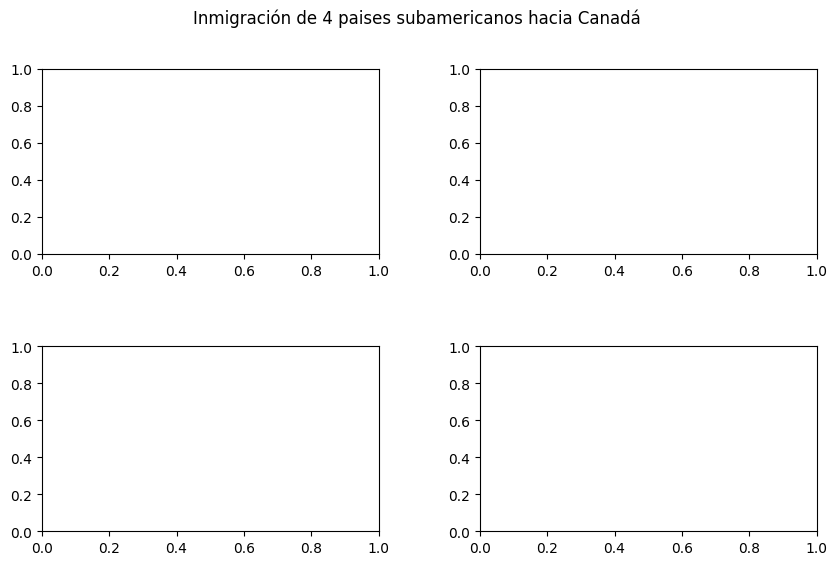

In [75]:
# Hacer 4 subgráficos

fig, axs = plt.subplots(2,2, figsize=(10,6))
fig.subplots_adjust(hspace=0.5,wspace=0.3)
fig.suptitle('Inmigración de 4 paises subamericanos hacia Canadá')

axs[0,0].plot(df.loc['Colombia', anos])
axs[0,0].set_title('Colombia')

axs[0,1].plot(df.loc['Brasil', anos])
axs[0,1].set_title('Brasil')

axs[1,0].plot(df.loc['Argentina', anos])
axs[1,0].set_title('Argentina')

axs[1,1].plot(df.loc['Perú', anos])
axs[1,1].set_title('Perú')

# debemos poner las gráficas a la misma escala
ymin = 0
ymax = 7000

for ax in axs.ravel():
  ax.set(ylim=(ymin,ymax))

# Puedo iterar en cada una de las gráficas
for ax in axs.flat:
  ax.set(xlabel='Año', ylabel='Número de Inmigrantes')
  ax.xaxis.set_major_locator(plt.MultipleLocator(5))
  ax.grid()

plt.show()

In [64]:
tiendas = ['A', 'B', 'C', 'D']
ventas_2022 = {'Ene': [100, 80, 150, 50],
    'Feb': [120, 90, 170, 60],
    'Mar': [150, 100, 200, 80],
    'Abr': [180, 110, 230, 90],
    'May': [220, 190, 350, 200],
    'Jun': [230, 150, 280, 120],
    'Jul': [250, 170, 300, 140],
    'Ago': [260, 180, 310, 150],
    'Sep': [240, 160, 290, 130],
    'Oct': [220, 140, 270, 110],
    'Nov': [400, 220, 350, 190],
    'Dec': [300, 350, 400, 250]}

In [79]:
# Para crear un DataFrame con estos datos, utilizando la columna "tiendas" como índice

datos = pd.DataFrame(ventas_2022, index=tiendas)
datos

,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dec
A,100,120,150,180,220,230,250,260,240,220,400,300
B,80,90,100,110,190,150,170,180,160,140,220,350
C,150,170,200,230,350,280,300,310,290,270,350,400
D,50,60,80,90,200,120,140,150,130,110,190,250


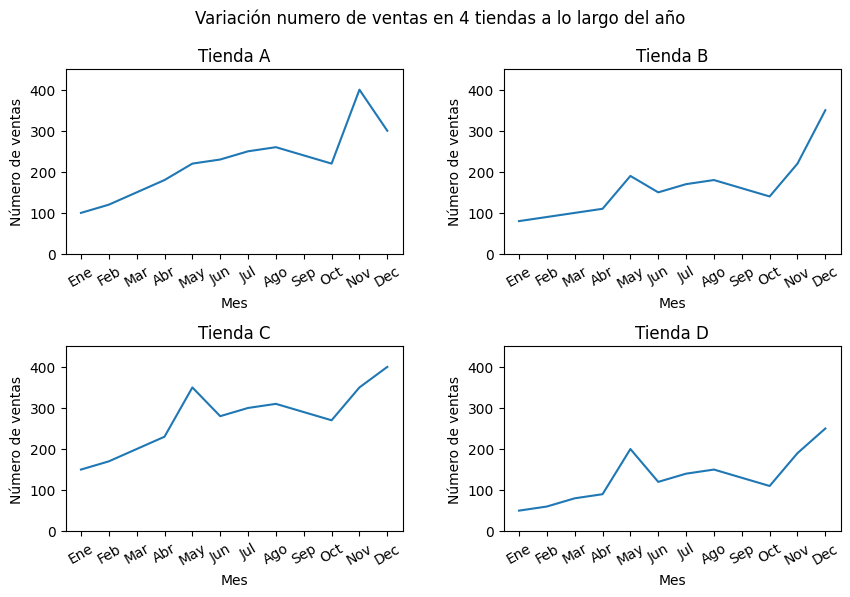

In [66]:
fig, axs = plt.subplots(2,2, figsize=(10,6))
fig.subplots_adjust(hspace=0.5,wspace=0.3)
fig.suptitle('Variación numero de ventas en 4 tiendas a lo largo del año')

# utilizar la propiedad loc de la biblioteca Pandas para trazar cada una de las tiendas.
axs[0,0].plot(df.loc['A'])
axs[0,0].set_title('Tienda A')

axs[0,1].plot(df.loc['B'])
axs[0,1].set_title('Tienda B')

axs[1,0].plot(df.loc['C'])
axs[1,0].set_title('Tienda C')

axs[1,1].plot(df.loc['D'])
axs[1,1].set_title('Tienda D')

ymin = 0
ymax = 450


for ax in axs.ravel():
  ax.set(ylim=(ymin,ymax))

for ax in axs.flat:
    ax.set_xlabel('Mes')
    ax.set_ylabel('Número de ventas')
    ax.tick_params(axis='x', rotation=30)

plt.show()

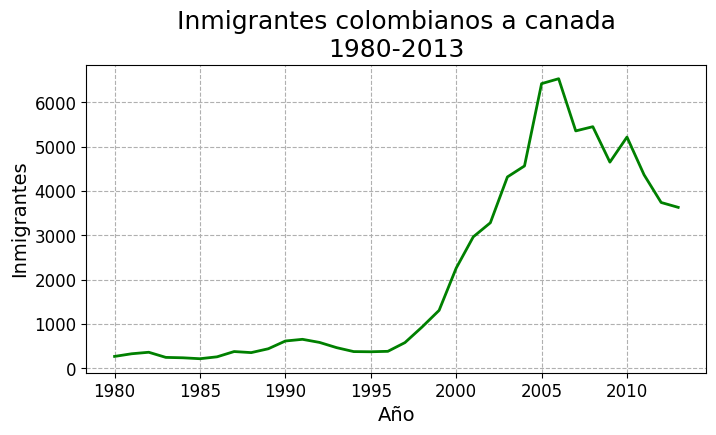

In [67]:
fif, ax= plt.subplots(figsize=(8,4))
ax.plot(datos_col['Año'], datos_col['Inmigrantes'], lw=2,color='g')
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.set_title('Inmigrantes colombianos a canada\n1980-2013', fontsize=18)
ax.set_xlabel('Año', fontsize=14)
ax.set_ylabel('Inmigrantes',fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.grid(linestyle='--')
plt.show()

# lw: grosor de la linea
# loc = left or righ, posición del titulo o leyenda

In [68]:
# para saber que estilos estan disponibles

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [69]:
# IPython_default = plt.rcParams.copy() con esta función almaceno y reutilizar las configuraciones
# predeterminadas de trazado o para restaurarlas después de haber sido modificadas

# plt.style.use('fivethirtyeight') otro estilo que se puede usar

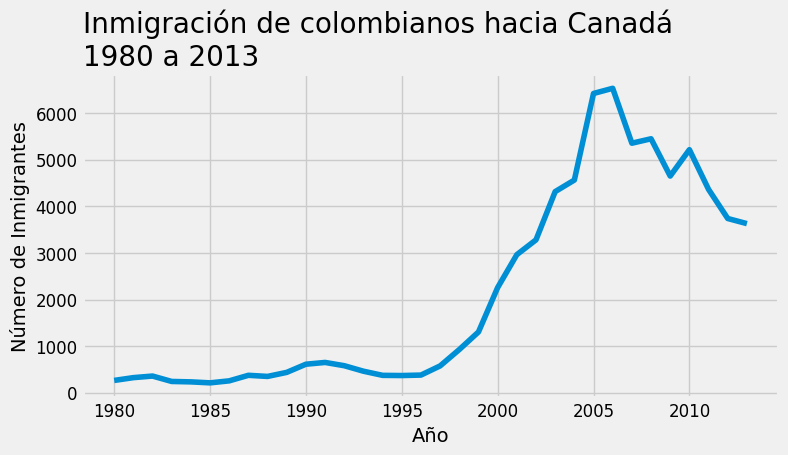

In [70]:
with plt.style.context('fivethirtyeight'):
  fig, ax = plt.subplots(figsize=(8, 4))
  ax.plot(datos_col['Año'], datos_col['Inmigrantes'])
  ax.set_title('Inmigración de colombianos hacia Canadá\n1980 a 2013', fontsize=20, loc='left')
  ax.set_ylabel('Número de Inmigrantes', fontsize=14)
  ax.set_xlabel('Año', fontsize=14)
  ax.yaxis.set_tick_params(labelsize=12)
  ax.xaxis.set_tick_params(labelsize=12)
  ax.xaxis.set_major_locator(plt.MultipleLocator(5))
  plt.show()

In [83]:
print(data.columns)

Index(['Pais', 'Continente', 'Region', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', 'Total'],
      dtype='object')


In [89]:
sudamerica = data.query('Region == "América del Sur"')
sudamerica

,Pais,Continente,Region,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
7,Argentina,América Latina y el Caribe,América del Sur,368,426,626,241,237,196,213,...,1153,847,620,540,467,459,278,263,282,19596
21,Bolivia,América Latina y el Caribe,América del Sur,44,52,42,49,38,44,79,...,134,139,107,143,214,180,86,83,107,3205
24,Brasil,América Latina y el Caribe,América del Sur,211,220,192,139,145,130,205,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659
35,Chile,América Latina y el Caribe,América del Sur,1233,1069,1078,781,681,533,633,...,384,427,530,350,375,340,174,291,273,21359
39,Colombia,América Latina y el Caribe,América del Sur,266,326,360,244,235,214,257,...,6424,6535,5357,5452,4652,5218,4366,3741,3631,72088
54,Ecuador,América Latina y el Caribe,América del Sur,238,207,184,155,179,208,240,...,491,525,419,437,373,353,348,282,418,12233
74,Guyana,América Latina y el Caribe,América del Sur,2334,2943,3575,2650,1932,2299,3942,...,1215,1286,1277,1137,1180,953,804,676,656,75785
134,Paraguay,América Latina y el Caribe,América del Sur,45,26,32,40,48,36,34,...,75,88,98,95,88,89,83,55,66,1944
135,Perú,América Latina y el Caribe,América del Sur,317,456,401,241,306,328,628,...,1653,1473,1490,1094,1884,1283,886,787,682,32652
165,Surinam,América Latina y el Caribe,América del Sur,15,10,21,12,5,16,7,...,15,16,20,9,12,13,11,16,4,739


In [98]:
sudamerica.set_index('Country', inplace=True)


colores = ['royalblue','orange','forestgreen','orchid',
           'purple','brown','slateblue','gray','olive',
           'navy','teal','tomato']

fig, ax = plt.subplots(figsize=(10,5))

ax.bar(sudamerica.index, sudamerica['Total'],color=colores,width=0.9)
ax.set_title('Inmigración de sudamericanos hacia Canadá\ndurante el periodo de 1980 hasta 2013',fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('Número de Inmigrantes', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.show()

KeyError: "None of ['Country'] are in the columns"

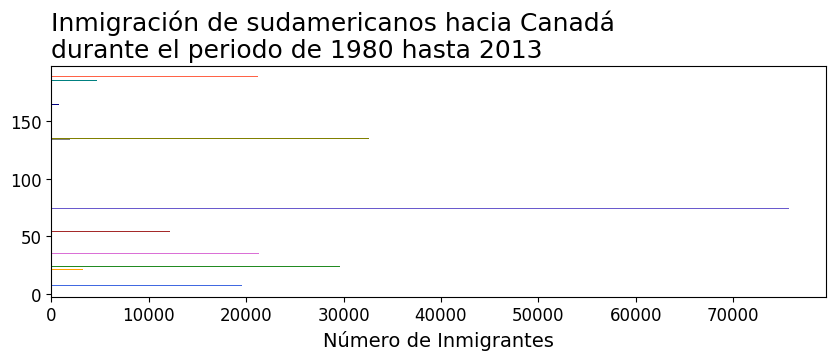

In [92]:
colores = ['royalblue','orange','forestgreen','orchid',
           'purple','brown','slateblue','gray','olive',
           'navy','teal','tomato']

fig, ax = plt.subplots(figsize=(10,3))

ax.barh(sudamerica.index, sudamerica['Total'],color=colores)
ax.set_title('Inmigración de sudamericanos hacia Canadá\ndurante el periodo de 1980 hasta 2013',
             loc='left',fontsize=18)
ax.set_ylabel('')
ax.set_xlabel('Número de Inmigrantes', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.show()

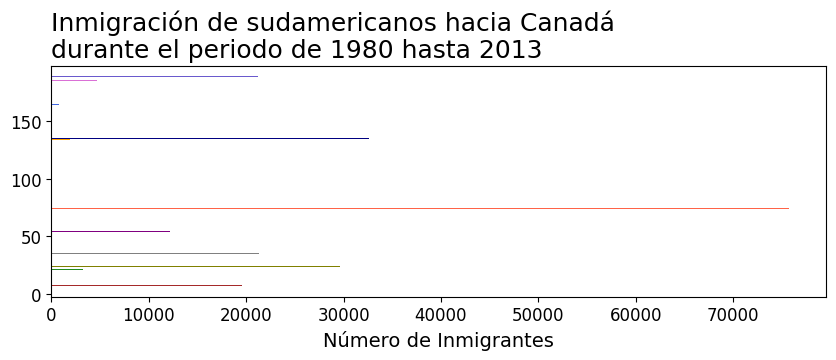

In [94]:
sudamerica_sorted = sudamerica.sort_values('Total',ascending=True)

colores = ['royalblue','orange','forestgreen','orchid',
           'purple','brown','slateblue','gray','olive',
           'navy','teal','tomato']

fig, ax = plt.subplots(figsize=(10,3))

ax.barh(sudamerica_sorted.index, sudamerica_sorted['Total'],color=colores)
ax.set_title('Inmigración de sudamericanos hacia Canadá\ndurante el periodo de 1980 hasta 2013',
             loc='left',fontsize=18)
ax.set_ylabel('')
ax.set_xlabel('Número de Inmigrantes', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.show()